# **Mempersiapkan Dataset**

**Import Library**

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os 

**Mengakses Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.listdir('/content/drive/MyDrive/databotol/')

['kaca', 'plastik', 'train', 'val']

**Melihat Jumlah File**

In [ ]:
len(os.listdir('/content/drive/MyDrive/databotol/kaca'))

1232

In [ ]:
len(os.listdir('/content/drive/MyDrive/databotol/plastik'))

1508

**Memisahkan Dataset Menjadi Train dan Validation**

In [ ]:
base_dir = '/content/drive/MyDrive/databotol'

#Buat train directory
train_dir = os.path.join(base_dir, 'train')

#Buat validation directory
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
#Cek apakah directory train & validation exists
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

In [ ]:
plastik_dir = os.path.join('/content/drive/MyDrive/databotol/plastik')
kaca_dir = os.path.join('/content/drive/MyDrive/databotol/kaca')

#Memecah directory menjadi train dan validation
train_plastik_dir, val_plastik_dir = train_test_split(os.listdir(plastik_dir), test_size = 0.4 )
train_kaca_dir, val_kaca_dir = train_test_split(os.listdir(kaca_dir), test_size = 0.4 )

In [ ]:
train_plastik = os.path.join(train_dir, 'plastik')
train_kaca = os.path.join(train_dir, 'kaca')

val_plastik = os.path.join(validation_dir, 'plastik')
val_kaca = os.path.join(validation_dir, 'kaca')

In [ ]:
if not os.path.exists(train_plastik):
    os.mkdir(train_plastik)
if not os.path.exists(train_kaca):
    os.mkdir(train_kaca)

if not os.path.exists(val_plastik):
    os.mkdir(val_plastik)
if not os.path.exists(val_kaca):
    os.mkdir(val_kaca)

In [ ]:
import shutil

#Copy data train ke directory baru
for i in train_plastik_dir:
    shutil.copy(os.path.join(plastik_dir, i), os.path.join(train_plastik, i))
for i in train_kaca_dir:
    shutil.copy(os.path.join(kaca_dir, i), os.path.join(train_kaca, i))

#Copy data validation ke directory baru
for i in val_plastik_dir:
    shutil.copy(os.path.join(plastik_dir, i), os.path.join(val_plastik, i))
for i in val_kaca_dir:
    shutil.copy(os.path.join(kaca_dir, i), os.path.join(val_kaca, i))

**Melihat Jumlah File Train dan Validation**

In [ ]:
len(os.listdir('/content/drive/MyDrive/databotol/train/plastik'))

904

In [ ]:
len(os.listdir('/content/drive/MyDrive/databotol/train/kaca'))

738

In [ ]:
len(os.listdir('/content/drive/MyDrive/databotol/val/plastik'))

604

In [ ]:
len(os.listdir('/content/drive/MyDrive/databotol/val/kaca'))

492

**Pelabelan Data**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range=0.2,
    fill_mode='nearest',
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(244,244),
    shuffle=True,
    batch_size=32,
    #subset='training',
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(244,244),
    # shuffle=False,
    batch_size=32,
    #subset='validation',
    class_mode='categorical',
)

Found 1636 images belonging to 2 classes.
Found 1094 images belonging to 2 classes.


# **Membuat Arsitektur Convolutional Neural Network**

**Model yang digunakan yaitu sequential**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(244, 244, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 242, 242, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 121, 121, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 119, 119, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

**Compile Model**

In [ ]:
print('Compiling Model')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Compiling Model


**Visualisasi Model**

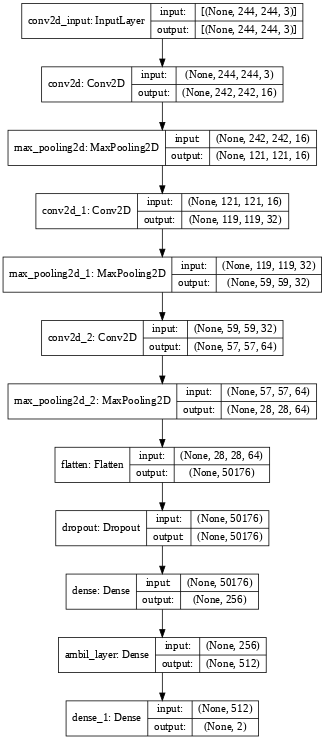

In [ ]:
import tensorflow as tf

model_viz = tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

## **Proses Training Model**

In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2,
)

Epoch 1/15
25/25 - 281s - loss: 0.8002 - accuracy: 0.6175 - val_loss: 0.6210 - val_accuracy: 0.6187
Epoch 2/15
25/25 - 151s - loss: 0.5180 - accuracy: 0.7280 - val_loss: 0.5756 - val_accuracy: 0.7063
Epoch 3/15
25/25 - 97s - loss: 0.4049 - accuracy: 0.8188 - val_loss: 0.4673 - val_accuracy: 0.8000
Epoch 4/15
25/25 - 68s - loss: 0.4203 - accuracy: 0.7962 - val_loss: 0.3643 - val_accuracy: 0.8250
Epoch 5/15
25/25 - 54s - loss: 0.3554 - accuracy: 0.8350 - val_loss: 0.3335 - val_accuracy: 0.8375
Epoch 6/15
25/25 - 43s - loss: 0.3011 - accuracy: 0.8675 - val_loss: 0.3392 - val_accuracy: 0.8438
Epoch 7/15
25/25 - 37s - loss: 0.3117 - accuracy: 0.8612 - val_loss: 0.2762 - val_accuracy: 0.8875
Epoch 8/15
25/25 - 30s - loss: 0.3518 - accuracy: 0.8407 - val_loss: 0.3468 - val_accuracy: 0.8750
Epoch 9/15
25/25 - 31s - loss: 0.2863 - accuracy: 0.8637 - val_loss: 0.3509 - val_accuracy: 0.8125
Epoch 10/15
25/25 - 25s - loss: 0.2648 - accuracy: 0.8963 - val_loss: 0.3464 - val_accuracy: 0.8687
Epoch 1

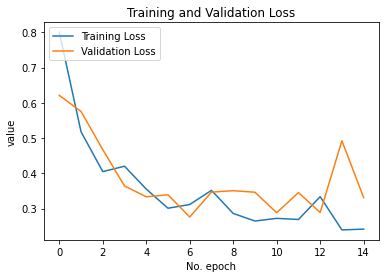

In [ ]:
from matplotlib import pyplot as plt

# Plot history: MAE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# **Membuat Fungsi Prediksi**

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

**Prediksi Gambar**

Saving plastico.jpg to plastico (1).jpg
plastico.jpg
Ini adalah Botol Plastik


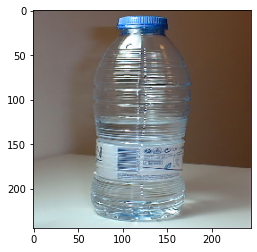

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(244,244))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    if classes[0][0] == 1:
        print('Ini adalah Botol Kaca')
    elif classes[0][1] == 1:
        print('Ini adalah Botol Plastik')

Saving botolk.png to botolk (1).png
botolk.png
Ini adalah Botol Kaca


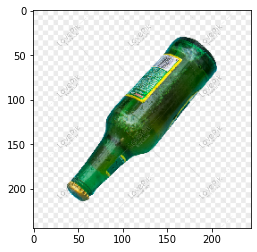

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(244,244))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    if classes[0][0] == 1:
        print('Ini adalah Botol Kaca')
    elif classes[0][1] == 1:
        print('Ini adalah Botol Plastik')

Saving botolp.jpeg to botolp.jpeg
botolp.jpeg
Ini adalah Botol Plastik


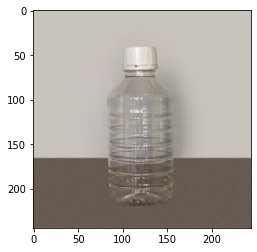

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(244,244))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    if classes[0][0] == 1:
        print('Ini adalah Botol Kaca')
    elif classes[0][1] == 1:
        print('Ini adalah Botol Plastik')

Saving botolk2.jpg to botolk2.jpg
botolk2.jpg
Ini adalah Botol Kaca


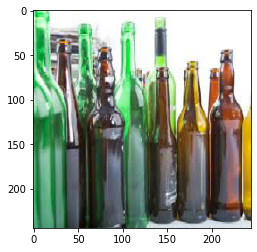

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(244,244))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    if classes[0][0] == 1:
        print('Ini adalah Botol Kaca')
    elif classes[0][1] == 1:
        print('Ini adalah Botol Plastik')

# **Save Model**

In [ ]:
model.save('model.h5')

# **Convert H5 to TFLITE**

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("modelbaru.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmprhastmc0/assets


52010332